In [1]:
import subprocess
import os
import glob
import shutil
import yaml
import argparse
import xarray as xr
import matplotlib.pyplot as plt
from functions import dateDecimal
from functions import preproc_nemo_T

In [25]:
expname='ayin'
leg = '11'
yearspan = 5
yearleap = 10
legstart = str(int(leg)-yearspan)
dirs = {
        'exp': os.path.join("/ec/res4/scratch/itas/ece4", expname),
        'nemo': os.path.join("/ec/res4/scratch/itas/ece4/", expname, "output", "nemo"),
        'restart': os.path.join("/ec/res4/scratch/itas/ece4/", expname, "restart"),
        'tmp': os.path.join("/ec/res4/scratch/itas/martini", expname),
        'rebuild': "/ec/res4/hpcperm/itas/src/rebuild_nemo"
}

In [27]:
legfile = os.path.join(dirs['exp'], 'leginfo.yml')
with open(legfile, 'r', encoding='utf-8') as file:
    leginfo = yaml.load(file, Loader=yaml.FullLoader)
info = leginfo['base.context']['experiment']['schedule']['leg']
endyear = info['start'].year - 1
startyear = endyear - yearspan

In [28]:
domain = xr.open_dataset(os.path.join(dirs['exp'], 'domain_cfg.nc'))
domain = domain.rename({'z': 'nav_lev'})
vol = domain['e1t']*domain['e2t']*domain['e3t_0']

In [29]:
def get_nemo_timestep(filename):
    return os.path.basename(filename).split('_')[1]

In [31]:
filelist = glob.glob(os.path.join(dirs['tmp'], legstart.zfill(3), expname + '*_restart.nc'))
timestep = get_nemo_timestep(filelist[0])
oce = os.path.join(dirs['tmp'], legstart.zfill(3), expname + '_' + timestep + '_restart.nc')
xfield0 = xr.open_dataset(oce)
filelist = glob.glob(os.path.join(dirs['tmp'], leg.zfill(3), expname + '*_restart.nc'))
timestep = get_nemo_timestep(filelist[0])
oce = os.path.join(dirs['tmp'], leg.zfill(3), expname + '_' + timestep + '_restart.nc')
xfield1 = xr.open_dataset(oce)
oce = os.path.join(dirs['tmp'], leg.zfill(3), 'restart.nc')
xfield2 = xr.open_dataset(oce)
oce = os.path.join(dirs['restart'], leg.zfill(3), 'restart.nc')
xfield2 = xr.open_dataset(oce)

In [33]:
dxt = {}
xt = {}
dxt['tn'] = xr.where(xfield1['tn']!=0, xfield2['tn'].values - xfield1['tn'].values, 0.0)

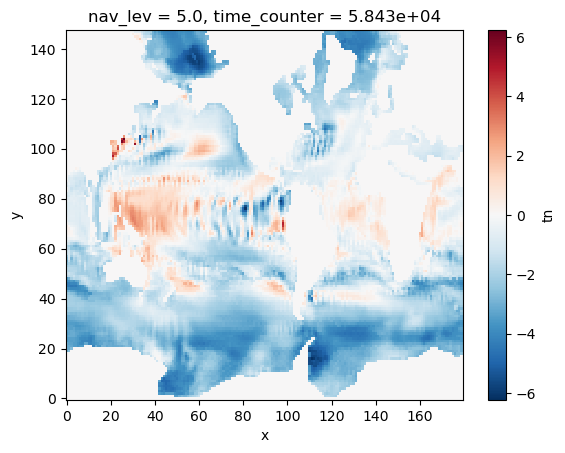

In [34]:
dxt['tn'].isel(time_counter=0,nav_lev=0).plot()

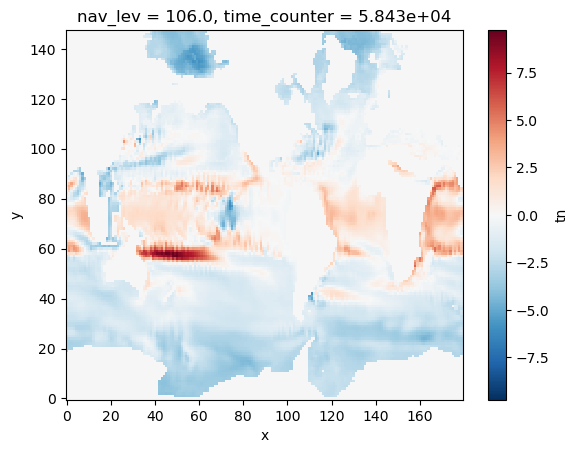

In [38]:
oce = os.path.join("/ec/res4/scratch/itas/martini", 'giml', leg.zfill(3), 'restart.nc')
xdata1 = xr.open_dataset(oce)
oce = os.path.join("/ec/res4/scratch/itas/martini", 'ayin', leg.zfill(3), 'restart.nc')
xdata2 = xr.open_dataset(oce)
dxt = {}
dxt['tn'] = xr.where(xfield1['tn']!=0, xfield2['tn'].values - xfield1['tn'].values, 0.0)
dxt['tn'].isel(time_counter=0,nav_lev=10).plot()
